# Test usage of ocean_remap class

In [1]:
import glob
import math
import pprint

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import yaml

from ocean_remap import ocean_remap

In [2]:
xr.set_options(keep_attrs=True);

## Load 2d remap matrix, list attributes, show portion of dst_grid

In [3]:
matrix_2d_fname = 'POP_gx1v7_to_latlon_1x1_0E_conserve_20180914.nc'
matrix_2d = ocean_remap(matrix_2d_fname)

In [4]:
print(matrix_2d)
print([attr for attr in dir(matrix_2d) if "__" not in attr])
print([attr for attr in dir(matrix_2d.dst_grid) if "__" not in attr])
help(matrix_2d.remap_var)

['dst_grid', 'matrix', 'remap_var', 'src_grid']
['area', 'def_dims_common', 'dims', 'frac', 'lat', 'lon', 'mask', 'write_var_CMIP_Ofx', 'write_vars_common']
Help on method remap_var in module ocean_remap:

remap_var(src_var, fill_value=1e+36) method of ocean_remap.ocean_remap instance
    Remap src_var, using matrix vector product, returning dst_var.



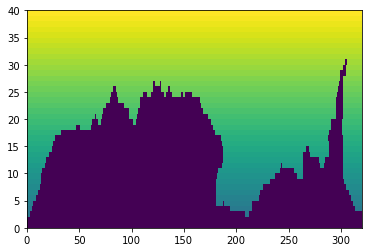

In [5]:
src_grid = matrix_2d.src_grid
plt.pcolormesh(src_grid.area.reshape(src_grid.dims)[:40,:]*src_grid.frac.reshape(src_grid.dims)[:40,:]);

In [6]:
src_area_rad2 = (src_grid.area * src_grid.frac).reshape(src_grid.dims)
print("fraction of Earth's surface covered by src_grid")
print(src_area_rad2.sum() / (4 * math.pi))

fraction of Earth's surface covered by src_grid
0.7070232828683563


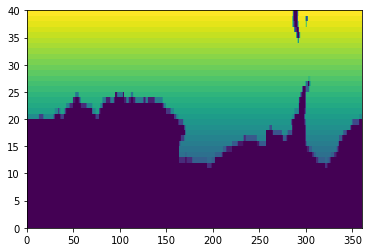

In [7]:
dst_grid = matrix_2d.dst_grid
plt.pcolormesh(dst_grid.area.reshape(dst_grid.dims)[:40,:]*dst_grid.frac.reshape(dst_grid.dims)[:40,:]);

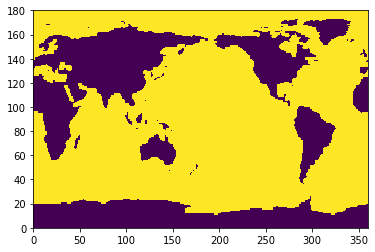

In [8]:
plt.pcolormesh(dst_grid.frac.reshape(dst_grid.dims)>0);

In [9]:
dst_area_rad2 = (dst_grid.area * dst_grid.frac).reshape(dst_grid.dims)
print("fraction of Earth's surface covered by dst_grid")
print(dst_area_rad2.sum() / (4 * math.pi))

fraction of Earth's surface covered by dst_grid
0.7070232828683563


## Load case metdata, for loading example input

In [10]:
with open("GCB_metadata.yaml", mode="r") as fptr:
    GCB_metadata = yaml.safe_load(fptr)
pprint.pprint(GCB_metadata)

{'A': {'cases': ['g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.GCB_2022.BDRD.001',
                 'g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.GCB_2022.BDRD.002']},
 'B': {'cases': ['g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.GCB_2022.BCRC.001']},
 'C': {'cases': ['g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.GCB_2022.BDRC.001']},
 'D': {'cases': ['g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.GCB_2022.BCRD.001',
                 'g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.GCB_2022.BCRD.002']}}


In [11]:
tseries_root = "/glade/campaign/cesm/development/bgcwg/projects/GCB_2022"

In [12]:
varname = "FG_CO2"
case = GCB_metadata["D"]["cases"][-1]
dir = f"{tseries_root}/{case}/output/ocn/proc/tseries/month_1"
path = glob.glob(f"{dir}/{case}.pop.h.{varname}.*.nc")[0]
ds = xr.open_dataset(path, chunks={"time":12})
ds

<xarray.Dataset>
Dimensions:                 (moc_comp: 3, transport_comp: 5, transport_reg: 2,
                             z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                             z_w_bot: 60, lat_aux_grid: 395, moc_z: 61,
                             nlat: 384, nlon: 320, time: 48, d2: 2)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time                    (time) object 2018-02-01 00:00:00 ... 2022-01-01 ...
Dimensions without coordinates: moc_comp, transport_comp, transport_reg, nlat,
                                nlon, d2
Data variables: (12/55)
    moc_components          (moc_comp) |S384 dask.array<chunksize=(3,), meta=np.ndarray>
    transport_components    (transport_comp) |S384 dask.array<chunksize=(5,), meta=np.ndarray>
    transport_regions       (transport_reg) |S384 dask.array<chunksize=(2,), meta=np.ndarray>
    dz                      (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    dzw                     (z_w) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    KMT                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ...                      ...
    salinity_factor         float64 ...
    sflux_factor            float64 ...
    nsurface_t              float64 ...
    nsurface_u              float64 ...
    time_bound              (time, d2) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    FG_CO2                  (time, nlat, nlon) float32 dask.array<chunksize=(12, 384, 320), meta=np.ndarray>
Attributes:
    title:             g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.GCB_2022.BCRD...
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2022-07-07 at 06:06:59.5
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

In [13]:
POP_area_cm2 = xr.where(ds["KMT"]>0, ds["TAREA"], 0.0).fillna(0).values
print("fraction of Earth's surface covered by POP grid")
rearth = ds["radius"].values
POP_area_cm2.sum() / (4 * math.pi * rearth**2)

fraction of Earth's surface covered by POP grid


0.7067474712956404

## Area correction factor, convert flux from per model area to per src_grid area

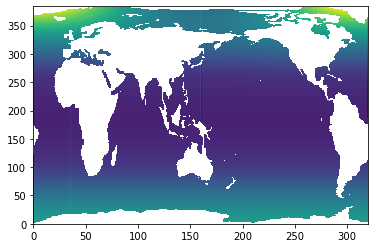

In [14]:
mdl2src = POP_area_cm2 / rearth**2 / src_area_rad2
plt.pcolormesh(mdl2src)

## Remap flux field, check conservation

array([ 1.97597189e+15,  4.10561797e+14,  5.13427233e+13,  7.67831497e+14,
        1.52475538e+15,  1.50885213e+15,  5.24818384e+14,  7.86236435e+13,
        6.15603310e+14,  1.79203930e+15,  2.97512126e+15,  3.07175822e+15,
        1.91038078e+15,  5.05118954e+14, -6.50980703e+14,  2.86714199e+14,
        1.59297881e+15,  1.12973211e+15,  3.52584675e+14, -3.18048252e+14,
        3.30485535e+14,  2.01344792e+15,  3.61840110e+15,  4.11566867e+15,
        1.98334254e+15,  4.08460735e+14, -5.82181796e+12,  7.56302299e+14,
        1.68800350e+15,  1.43182396e+15,  4.01218919e+14, -2.95146156e+14,
        1.35769762e+13,  1.52635485e+15,  2.96528376e+15,  3.57655726e+15,
        2.02467375e+15,  5.11704278e+14, -2.58358657e+14,  5.57154711e+14,
        1.64581649e+15,  1.53278762e+15,  5.32142271e+13, -3.38348792e+14,
       -3.31729524e+14,  1.30377499e+15,  2.53434228e+15,  2.75537786e+15])

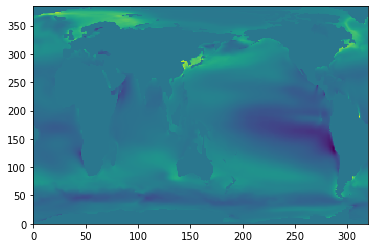

In [15]:
da = ds["FG_CO2"]

slice_POP = da.fillna(0).values
plt.pcolormesh(slice_POP.mean(axis=0))
integral_gn_POP = (slice_POP * POP_area_cm2).sum(axis=(1, 2))
integral_gn_POP

masked_array(data=[1.0000000000000002, 1.0, 0.9999999999999988, 1.0, 1.0,
                   1.0, 1.0, 1.0000000000000009, 1.0000000000000002, 1.0,
                   1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0,
                   1.0000000000000002, 1.0, 1.0000000000000004,
                   1.0000000000000009, 1.0, 1.0, 1.0, 1.0000000000000002,
                   1.0, 0.9999999999999999, 0.9999999999998926,
                   0.9999999999999997, 1.0, 1.0, 1.0000000000000007, 1.0,
                   1.0, 1.0, 1.0, 1.0000000000000002, 1.0000000000000002,
                   1.0, 1.0, 1.0, 1.0, 0.9999999999999997,
                   1.0000000000000047, 1.0000000000000007,
                   1.0000000000000018, 1.0, 0.9999999999999998, 1.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False,

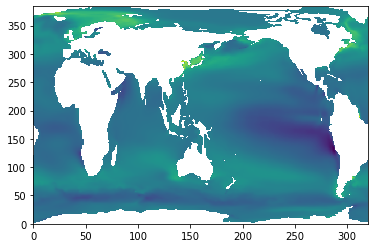

In [16]:
slice_src = slice_POP * mdl2src
plt.pcolormesh(slice_src.mean(axis=0))
integral_gn = (slice_src * src_area_rad2 * rearth**2).sum(axis=(1, 2))
integral_gn / integral_gn_POP

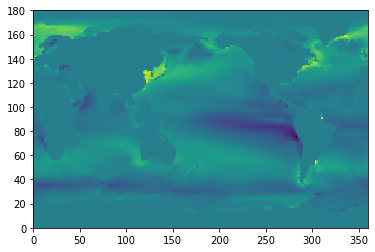

In [17]:
slice_dst = matrix_2d.remap_var(slice_src)
plt.pcolormesh(slice_dst.mean(axis=0))

In [18]:
dst_area_cm2 = rearth**2 * dst_area_rad2
integral_gr = (slice_dst * dst_area_cm2).sum(axis=(1, 2))
integral_gr / integral_gn

masked_array(data=[0.9999999999999998, 1.0000000000000007,
                   0.9999999999999988, 1.0, 0.9999999999999999,
                   0.9999999999999997, 0.9999999999999996,
                   1.0000000000000004, 0.9999999999999996,
                   1.0000000000000002, 1.0, 0.9999999999999999,
                   0.9999999999999999, 0.9999999999999996, 1.0,
                   0.9999999999999966, 1.0000000000000002,
                   0.9999999999999996, 1.0000000000000016,
                   0.9999999999999992, 1.0000000000000007,
                   0.9999999999999998, 1.0000000000000002,
                   0.9999999999999999, 1.0000000000000002,
                   1.0000000000000002, 0.9999999999999839,
                   1.0000000000000002, 1.0, 1.0000000000000002, 1.0,
                   1.0000000000000004, 1.0000000000000047, 1.0,
                   1.0000000000000004, 0.9999999999999999,
                   0.9999999999999999, 1.0000000000000009,
                   1.00000

## Apply dst_grid mask

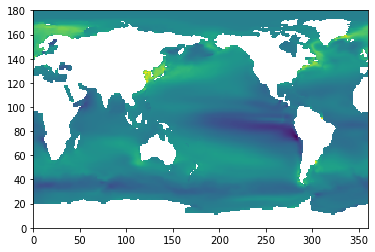

In [19]:
slice_dst = np.where(dst_grid.frac.reshape(dst_grid.dims) > 0, slice_dst, np.nan)
plt.pcolormesh(slice_dst.mean(axis=0))

## Write remapped field to netCDF file

In [20]:
dst_da = xr.DataArray(
    slice_dst,
    coords={"time": ds["time"], "lat": dst_grid.lat, "lon": dst_grid.lon},
    attrs=da.attrs,
)
del dst_da.attrs["grid_loc"]
dst_da.encoding = da.encoding
del dst_da.encoding["coordinates"]
dst_da["lat"].attrs = {"long_name": "latitude", "units": "degrees_north"}
dst_da["lon"].attrs = {"long_name": "longitude", "units": "degrees_east"}
tb_name = ds["time"].attrs["bounds"]
dst_ds = xr.Dataset(
    {"time": ds["time"], tb_name: ds[tb_name], da.name: dst_da}
)
dst_ds
dst_ds.encoding = ds.encoding

# ensure NaN _FillValues do not get generated
for d in [dst_ds.variables, dst_ds.coords]:
    for var in d:
        if "_FillValue" not in dst_ds[var].encoding:
            dst_ds[var].encoding["_FillValue"] = None

dst_ds.to_netcdf("remap_test.nc")